In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import sys
np.set_printoptions(threshold=sys.maxsize)



In [9]:
#Read CVN Score for each lorentz factor and atmospheric neutrinos

b1p1 = np.loadtxt('CVN_b1p1_00a_m10.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
b1p5 = np.loadtxt('CVN_b1p5_00a_m10.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
b10 = np.loadtxt('CVN_b10_00a_m10.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
AtmCC = np.loadtxt('CVN_cc_00a_atm.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
AtmNC = np.loadtxt('CVN_nc_00a_m10.txt', delimiter=' ', skiprows=1,  dtype=np.float32)

In [10]:
print(AtmCC.size)
print(AtmNC.size)
print(b10.size)

660915
218925
87990


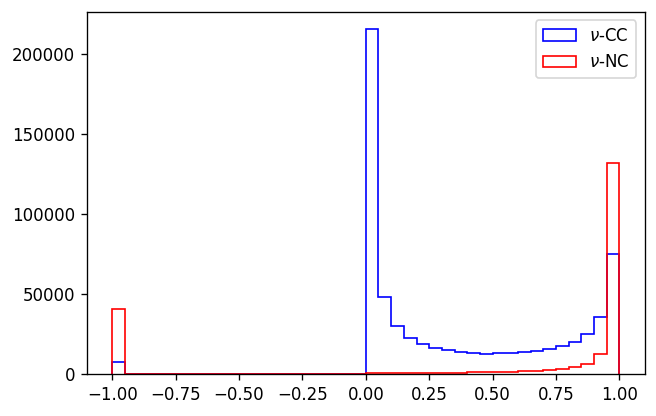

In [16]:
plt.figure(dpi=120)
plt.hist(AtmCC, color = "blue",label=r'$\nu$-CC',bins=40, histtype='step')
plt.hist(AtmNC,color = "red",label=r'$\nu$-NC',bins=40, histtype='step')
plt.legend()
plt.show()

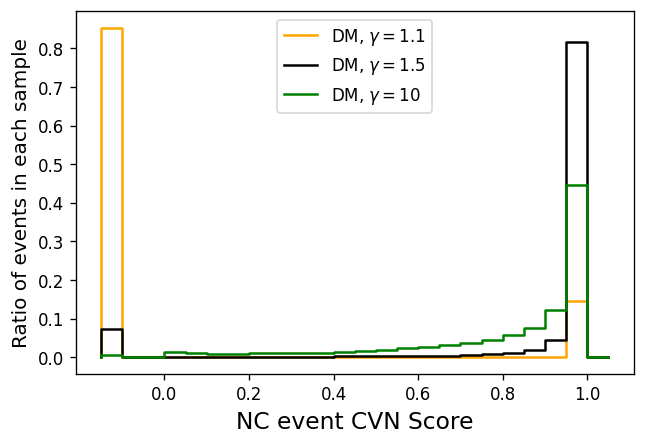

In [18]:
PosNoScore = -0.1
BinInit = -0.2
BinEnd =  1.10
SizeofBin = 0.05

AtmCC = np.where(AtmCC == -1, PosNoScore, AtmCC)
AtmNC = np.where(AtmNC == -1, PosNoScore, AtmNC)
b10 = np.where(b10 == -1, PosNoScore, b10)
b1p5 = np.where(b1p5 == -1, PosNoScore, b1p5)
b1p1 = np.where(b1p1 == -1, PosNoScore, b1p1)

hist_AtmCC, bins_AtmCC = np.histogram(AtmCC,np.arange(BinInit,BinEnd,SizeofBin))
hist_AtmNC, bins_AtmNC = np.histogram(AtmNC,np.arange(BinInit,BinEnd,SizeofBin))
hist_b1p1, bins_b1p1 = np.histogram(b1p1,np.arange(BinInit,BinEnd,SizeofBin))
hist_b1p5, bins_b1p5 = np.histogram(b1p5,np.arange(BinInit,BinEnd,SizeofBin))
hist_b10, bins_b10 = np.histogram(b10,np.arange(BinInit,BinEnd,SizeofBin))

bins_AtmCC = np.delete(bins_AtmCC, 0)
bins_AtmNC = np.delete(bins_AtmNC, 0)
bins_b1p1 = np.delete(bins_b1p1, 0)
bins_b1p5 = np.delete(bins_b1p5, 0)
bins_b10 = np.delete(bins_b10, 0)



plt.figure(dpi=120)
#plt.step(bins_AtmCC,hist_AtmCC.astype(float)/AtmCC.size, color = "blue",label=r'$\nu$-CC')
#plt.step(bins_AtmNC,hist_AtmNC.astype(float)/AtmNC.size,color = "red",label=r'$\nu$-NC')
plt.step(bins_b1p1,hist_b1p1.astype(float)/b1p1.size,color = "orange",label=r'DM, $\gamma=1.1$')
plt.step(bins_b1p5,hist_b1p5.astype(float)/b1p5.size,color = "black",label=r'DM, $\gamma=1.5$')
plt.step(bins_b10,hist_b10.astype(float)/b10.size,color = "green",label=r'DM, $\gamma=10$')
plt.yticks(np.arange(0, 0.9, step=0.1))
plt.xticks(np.arange(0, 1.2, step=0.2))
plt.xlabel(r'NC event CVN Score',fontsize = 14) 
plt.ylabel('Ratio of events in each sample',fontsize = 12) 
#plt.legend(title = r'$m_\chi=10$ GeV', loc='upper center', frameon=True)
plt.legend(loc='upper center', frameon=True)
plt.savefig('CVNAllAtm.png', format='png', dpi=600)
#plt.title('Events with at least 1 track or shower reconstructed by Pandora', fontsize=10)
plt.show()